In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados = pd.read_csv('dados.csv')

In [ ]:
dados.head()

UF  Sexo  Idade  Cor  Anos de Estudo  Renda    Altura
0  11     0     23    8              12    800  1.603808
1  11     1     23    2              12   1150  1.739790
2  11     1     35    8              15    880  1.760444
3  11     0     46    2               6   3500  1.783158
4  11     1     47    8               9    150  1.690631

# Distribuição Binomial

### Probabilidade

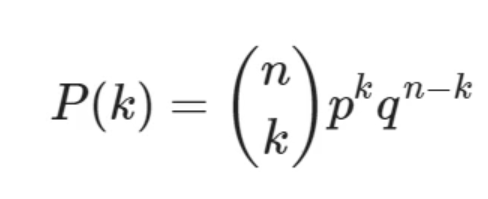

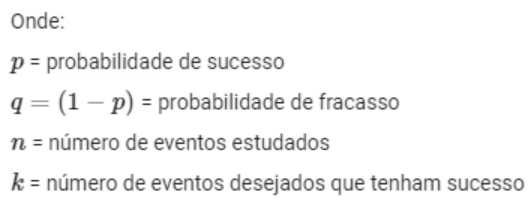

In [ ]:
## vamos utilizar comb para calcular combinações de chances

from scipy.special import comb

### Exemplo

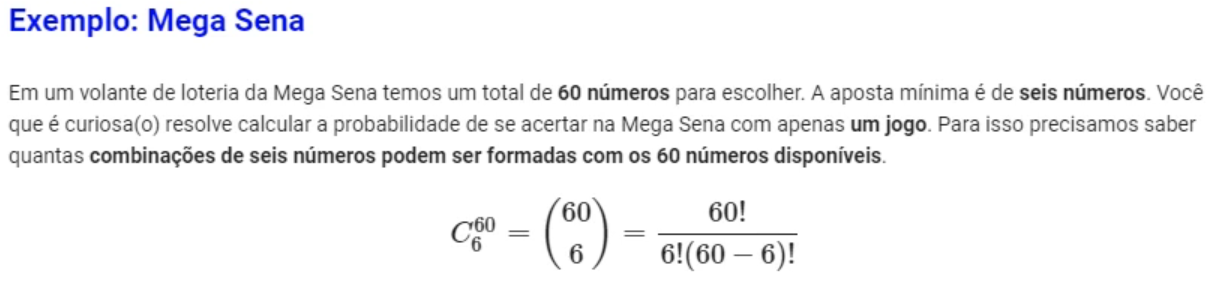


In [ ]:
## combinações de seis números que podem ser formados com 60 números

combinacoes = comb(60, 6)
combinacoes

50063860.0

In [ ]:
## probabilidade de ganhar na mega sena, escolhendo o mesmo número sorteado

probabilidade = 1 / combinacoes
print('%0.15f' % probabilidade)

0.000000019974489


### Exemplo II

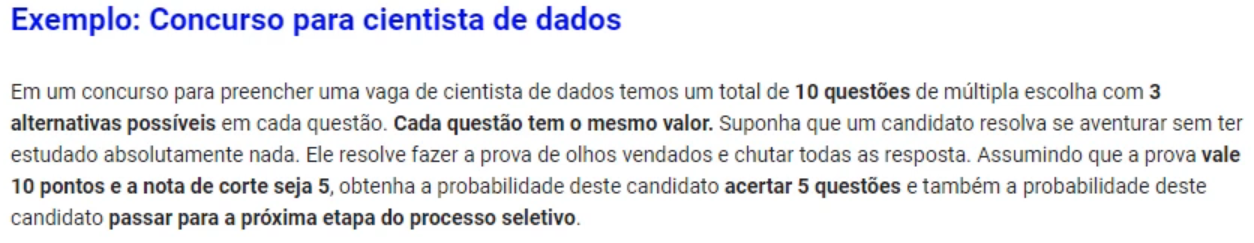

In [ ]:
## número de ensaios
n = 10
n

10

In [ ]:
## probabilidade de sucesso

numero_de_alternativas_por_questao = 3
p = 1 / numero_de_alternativas_por_questao
p

0.3333333333333333

In [ ]:
## probabilidade de fracasso
q = 1 - p
q

0.6666666666666667

In [ ]:
## total de eventos que se deseja obter sucesso

k = 5
k

5

In [ ]:
## usando a fórmula para realizar o cálculo de probabilidade de acerto

probabilidade = (comb(n, k) * (p**k) * (q**(n-k)))
print('%0.15f' % probabilidade)

0.136564548087182


### Fazendo usando scipy

In [ ]:
## importando

from scipy.stats import binom

In [ ]:
## usamos o método binom.pmf(k, n, p) para realizar o cálculo de probabilidade

probabilidade = binom.pmf(k, n, p)
print('%0.15f' % probabilidade)

0.136564548087181


Agora vamos calcular a probabilidade do candidato passar, para isso ele deve acertar mais de 5. Ou seja > 5

In [ ]:
## fazendo manualmente e somando para obter a probabilidade final

binom.pmf(5, n, p) + binom.pmf(6, n, p) + binom.pmf(7, n, p) + binom.pmf(8, n, p) + binom.pmf(9, n, p) + binom.pmf(10, n, p)

0.21312808006909476

In [ ]:
## calculando novamente, usando lista e sum

binom.pmf([5, 6, 7, 8, 9, 10], n, p).sum()

0.21312808006909476

In [ ]:
## podemos usar o método binom.cdf para trazer uma probabilidade acumulativa

binom.cdf(4, n, p)

0.7868719199309048

In [ ]:
## nesse caso estamos subtraindo 1 para obter a diferença, visto que queremos a probabilidade de 5 - 10.

1 - binom.cdf(4, n, p)

0.21312808006909523

In [ ]:
## binom.sf() trás automaticamente a diferença

binom.sf(4, n, p)

0.21312808006909525

Uma moeda, perfeitamente equilibrada, é lançada para o alto quatro vezes. Utilizando a distribuição binomial, obtenha a probabilidade de a moeda cair com a face coroa voltada para cima duas vezes.

In [ ]:
n = 4
p = 1/2
k = 2
q = 1 - p

probabilidade = binom.pmf(k, n, p)
print('%0.15f' % probabilidade)

0.375000000000000


Um dado, perfeitamente equilibrado, é lançado para o alto dez vezes. Utilizando a distribuição binomial, obtenha a probabilidade de o dado cair com o número cinco voltado para cima pelo menos três vezes.

In [ ]:
from scipy.stats import binom

p = 1 / 6   # Probabilidade de sair o número CINCO
n = 10      # Total de lançamentos

print("{0:.2%}".format(binom.sf(2, n, p)))

22.48%


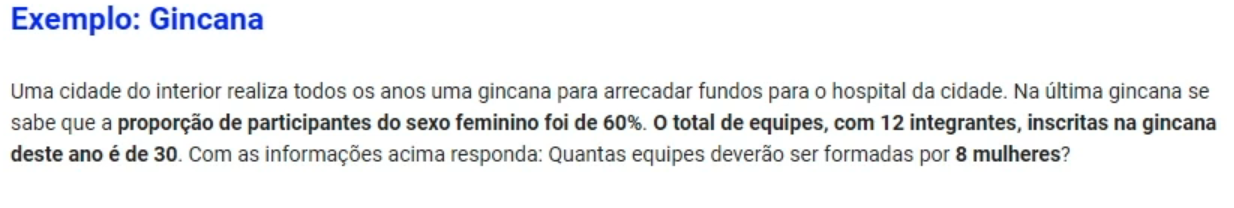

In [ ]:
p = 0.6
p

0.6

In [ ]:
n = 12
n

12

In [ ]:
k = 8
k

8

In [ ]:
## aqui calculamos a probabilidade de quantas equipes serem formadas por 8 mulheres e 4 homens

probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.21284094


In [ ]:
## aqui calculamos quantas equipes deverão ser formadas, multiplicando a quantidade de equipe pela probabilidade de acontecer

equipes = 30 * probabilidade
print('%0.f' % equipes)

6


Suponha que a probabilidade de um casal ter filhos com olhos azuis seja de 22%. Em 50 famílias, com 3 crianças cada uma, quantas podemos esperar que tenham dois filhos com olhos azuis?

In [ ]:
n = 3               ## 3 pois queremos a probabilidade de nascer duas crianças em uma mesma familia.
p = 22 / 100
k = 2

probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.11325600


In [ ]:
equipes = 50 * probabilidade      ## aqui multiplicamos por 50, pois queremos multiplicar a probabilidade pela quantidade de familias.
print('%0.2f' % equipes)

5.66


# Distribuição Poisson

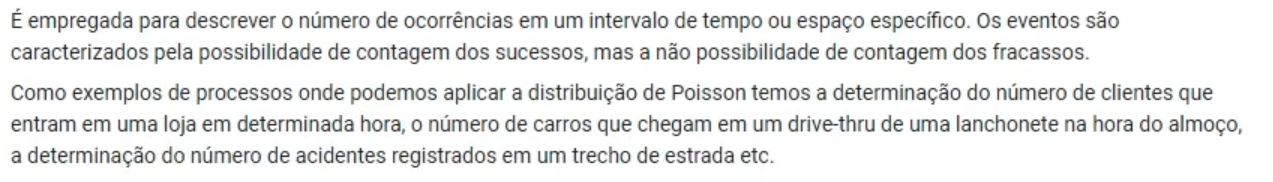

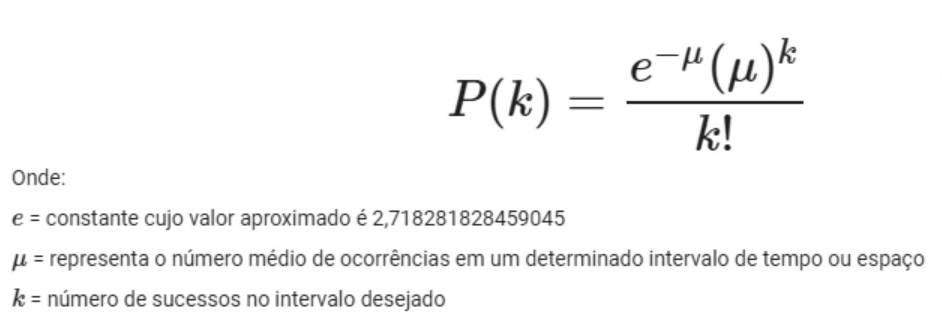

In [ ]:
## usamos np.e para puxar o e = 2,718281

np.e

2.718281828459045

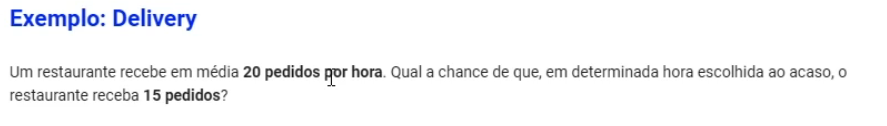

In [ ]:
media = 20

In [ ]:
k = 15

In [ ]:
## realizando o calculo

probabilidade = ((np.e ** (- media)) * (media ** k)) / (np.math.factorial(k))
print('%0.8f' % probabilidade)

0.05164885


<ipython-input-35-43d9bff60fc8>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  probabilidade = ((np.e ** (- media)) * (media ** k)) / (np.math.factorial(k))


In [ ]:
## outra forma de realizar o cálculo é usando poisso.mf(k, media)

from scipy.stats import poisson

probabilidade = poisson.pmf(k, media)
print('%0.8f' % probabilidade)

0.05164885




O número médio de clientes que entram em uma padaria por hora é igual a 20. Obtenha a probabilidade de, na próxima hora, entrarem exatamente 25 clientes.

In [ ]:
media = 20
k = 25

probabilidade = poisson.pmf(k, media)
print('%0.8f' % probabilidade)

0.04458765


# Distribuição Normal

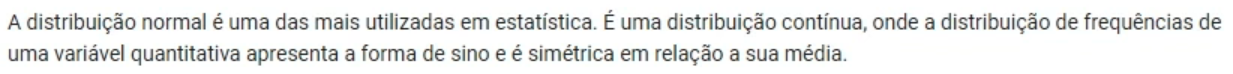

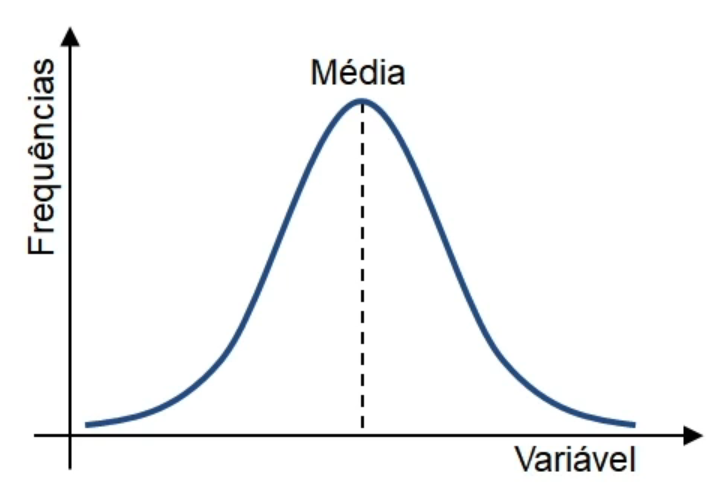

## Tabela Padronizada

Criando Tabela Z

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [],
    index = ["{0:0.02f}".format(i / 100) for i in range (0, 400, 10)],
    columns = ["{0:0.02f}".format(i / 100) for i in range (0, 10)])

for index in tabela_normal_padronizada.index:
  for column in tabela_normal_padronizada.columns:
    Z = np.round(float(index) + float(column), 2)
    tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)
tabela_normal_padronizada

Z       0.00    0.01    0.02    0.03    0.04    0.05    0.06    0.07    0.08  \
0.00  0.5000  0.5040  0.5080  0.5120  0.5160  0.5199  0.5239  0.5279  0.5319   
0.10  0.5398  0.5438  0.5478  0.5517  0.5557  0.5596  0.5636  0.5675  0.5714   
0.20  0.5793  0.5832  0.5871  0.5910  0.5948  0.5987  0.6026  0.6064  0.6103   
0.30  0.6179  0.6217  0.6255  0.6293  0.6331  0.6368  0.6406  0.6443  0.6480   
0.40  0.6554  0.6591  0.6628  0.6664  0.6700  0.6736  0.6772  0.6808  0.6844   
0.50  0.6915  0.6950  0.6985  0.7019  0.7054  0.7088  0.7123  0.7157  0.7190   
0.60  0.7257  0.7291  0.7324  0.7357  0.7389  0.7422  0.7454  0.7486  0.7517   
0.70  0.7580  0.7611  0.7642  0.7673  0.7704  0.7734  0.7764  0.7794  0.7823   
0.80  0.7881  0.7910  0.7939  0.7967  0.7995  0.8023  0.8051  0.8078  0.8106   
0.90  0.8159  0.8186  0.8212  0.8238  0.8264  0.8289  0.8315  0.8340  0.8365   
1.00  0.8413  0.8438  0.8461  0.8485  0.8508  0.8531  0.8554  0.8577  0.8599   
1.10  0.8643  0.8665  0.8686  0.8708  0.8729  0.8749  0.8770  0.8790  0.8810   
1.20  0.8849  0.8869  0.8888  0.8907  0.8925  0.8944  0.8962  0.8980  0.8997   
1.30  0.9032  0.9049  0.9066  0.9082  0.9099  0.9115  0.9131  0.9147  0.9162   
1.40  0.9192  0.9207  0.9222  0.9236  0.9251  0.9265  0.9279  0.9292  0.9306   
1.50  0.9332  0.9345  0.9357  0.9370  0.9382  0.9394  0.9406  0.9418  0.9429   
1.60  0.9452  0.9463  0.9474  0.9484  0.9495  0.9505  0.9515  0.9525  0.9535   
1.70  0.9554  0.9564  0.9573  0.9582  0.9591  0.9599  0.9608  0.9616  0.9625   
1.80  0.9641  0.9649  0.9656  0.9664  0.9671  0.9678  0.9686  0.9693  0.9699   
1.90  0.9713  0.9719  0.9726  0.9732  0.9738  0.9744  0.9750  0.9756  0.9761   
2.00  0.9772  0.9778  0.9783  0.9788  0.9793  0.9798  0.9803  0.9808  0.9812   
2.10  0.9821  0.9826  0.9830  0.9834  0.9838  0.9842  0.9846  0.9850  0.9854   
2.20  0.9861  0.9864  0.9868  0.9871  0.9875  0.9878  0.9881  0.9884  0.9887   
2.30  0.9893  0.9896  0.9898  0.9901  0.9904  0.9906  0.9909  0.9911  0.9913   
2.40  0.9918  0.9920  0.9922  0.9925  0.9927  0.9929  0.9931  0.9932  0.9934   
2.50  0.9938  0.9940  0.9941  0.9943  0.9945  0.9946  0.9948  0.9949  0.9951   
2.60  0.9953  0.9955  0.9956  0.9957  0.9959  0.9960  0.9961  0.9962  0.9963   
2.70  0.9965  0.9966  0.9967  0.9968  0.9969  0.9970  0.9971  0.9972  0.9973   
2.80  0.9974  0.9975  0.9976  0.9977  0.9977  0.9978  0.9979  0.9979  0.9980   
2.90  0.9981  0.9982  0.9982  0.9983  0.9984  0.9984  0.9985  0.9985  0.9986   
3.00  0.9987  0.9987  0.9987  0.9988  0.9988  0.9989  0.9989  0.9989  0.9990   
3.10  0.9990  0.9991  0.9991  0.9991  0.9992  0.9992  0.9992  0.9992  0.9993   
3.20  0.9993  0.9993  0.9994  0.9994  0.9994  0.9994  0.9994  0.9995  0.9995   
3.30  0.9995  0.9995  0.9995  0.9996  0.9996  0.9996  0.9996  0.9996  0.9996   
3.40  0.9997  0.9997  0.9997  0.9997  0.9997  0.9997  0.9997  0.9997  0.9997   
3.50  0.9998  0.9998  0.9998  0.9998  0.9998  0.9998  0.9998  0.9998  0.9998   
3.60  0.9998  0.9998  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999   
3.70  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999   
3.80  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999   
3.90  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000   

Z       0.09  
0.00  0.5359  
0.10  0.5753  
0.20  0.6141  
0.30  0.6517  
0.40  0.6879  
0.50  0.7224  
0.60  0.7549  
0.70  0.7852  
0.80  0.8133  
0.90  0.8389  
1.00  0.8621  
1.10  0.8830  
1.20  0.9015  
1.30  0.9177  
1.40  0.9319  
1.50  0.9441  
1.60  0.9545  
1.70  0.9633  
1.80  0.9706  
1.90  0.9767  
2.00  0.9817  
2.10  0.9857  
2.20  0.9890  
2.30  0.9916  
2.40  0.9936  
2.50  0.9952  
2.60  0.9964  
2.70  0.9974  
2.80  0.9981  
2.90  0.9986  
3.00  0.9990  
3.10  0.9993  
3.20  0.9995  
3.30  0.9997  
3.40  0.9998  
3.50  0.9998  
3.60  0.9999  
3.70  0.9999  
3.80  0.9999  
3.90  1.0000

### Exemplo

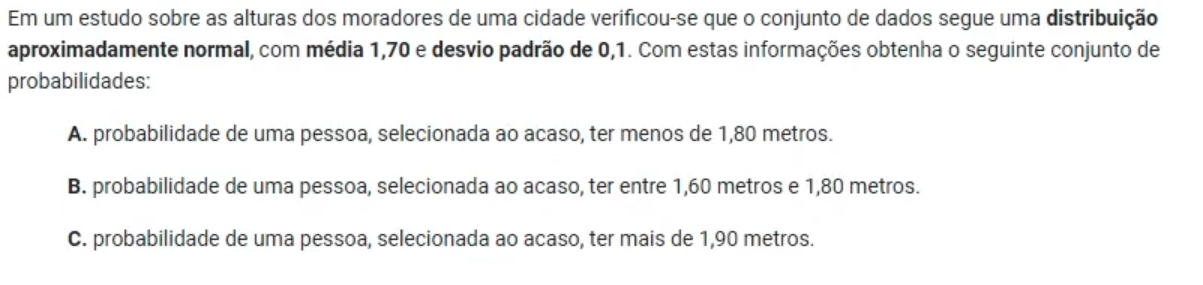

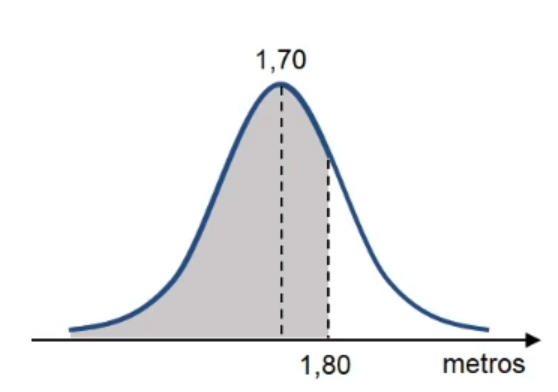

In [ ]:
# media e desvio já foram dados

media = 1.70
desvio_padrao = 0.1

In [ ]:
# realizando o cálculo.

Z = (1.80 - media) / desvio_padrao
Z

1.0000000000000009

In [ ]:
## olhamos na tabela 0.1 e pegamos o valor

probabilidade = 0.8413
probabilidade

0.8413

In [ ]:
## Outra forma de pegar o valor sme olha a tabela é colocando a probabilidade no método norm.cdf()
## o valor tende a ser mais exato

norm.cdf(Z)

0.8413447460685431

Exemplo II

A aplicação de uma prova de estatística em um concurso apresentou um conjunto de notas normalmente distribuídas. Verificou-se que o conjunto de notas tinha média 70 e desvio padrão de 5 pontos.

Qual a probabilidade de um aluno, selecionado ao acaso, ter nota menor que 85?

In [ ]:
media = 70
desvio_padrao = 5

Z = (85 - media) / desvio_padrao
Z = norm.cdf(Z)
Z

0.9986501019683699

probabilidade de uma pessoa ter entre 1.60 e 1.80 metros


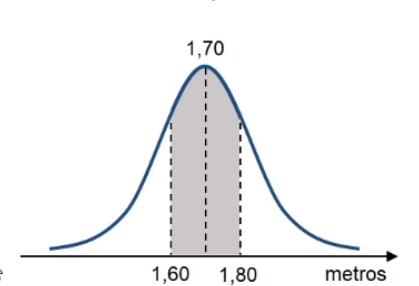

In [ ]:

## definimos a media, desvio e Z de 1.80 metros

media = 1.70
desvio_padrao = 0.1

Z = (1.80 - media) / desvio_padrao
Z

1.0000000000000009

In [ ]:
## tiramos 0.5 para pegar a área de 1.70 à 1.80.
## e multiplicamos por 2 pois a distância entre 1.70 - 1.80 é  mesma que 1.60 - 1.70

probabilidade = (0.8413 - 0.5) * 2
probabilidade

0.6826000000000001

In [ ]:
## usando Scipy
#3 criamos o Z superior e inferior

Z_superior = round((1.80 - media) / desvio_padrao, 2)
Z_inferior = round((1.60 - media) / desvio_padrao, 2)
print(Z_superior)
print(Z_inferior)





1.0
-1.0


In [ ]:
## calculamos a probabilidade retirando o superior do inferior

probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
probabilidade

0.6826894921370859

O faturamento diário de um motorista de aplicativo segue uma distribuição aproximadamente normal, com média RS 300,00 e desvio padrão igual a R$ 50,00. Obtenha as probabilidades de que, em um dia aleatório, o motorista ganhe:

1) Entre RS 250,00 e R$ 350,00

2) Entre RS 400,00 e R$ 500,00

In [ ]:
media = 300
desvio_padrao = 50

Z_superior = (350 - media) / desvio_padrao
Z_inferior = (250 - media) / desvio_padrao

probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
probabilidade

0.6826894921370859

In [ ]:
media = 300
desvio_padrao = 50

Z_superior = (500 - media) / desvio_padrao
Z_inferior = (400 - media) / desvio_padrao

probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
probabilidade

0.02271846070634609

Probabilidade de uma pessoa ter mais de 1.90

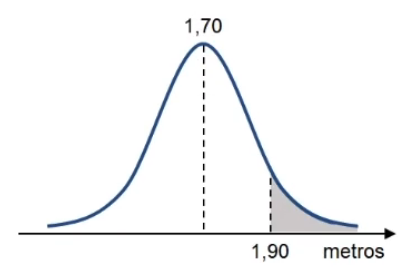

In [ ]:
media = 1.70
desvio_padrao = 0.1

In [ ]:
Z = (1.9 - media)/desvio_padrao
Z

1.9999999999999996

In [ ]:
## usando a tabela

probabilidade = 1 - 0.9772
probabilidade

0.022800000000000042

In [ ]:
## usando o Scipy

probabilidade = 1 - norm.cdf(Z)
probabilidade

0.02275013194817921

O Inmetro verificou que as lâmpadas incandescentes da fabricante XPTO apresentam uma vida útil normalmente distribuída, com média igual a 720 dias e desvio padrão igual a 30 dias. Calcule a probabilidade de uma lâmpada, escolhida ao acaso, durar:

1) Entre 650 e 750 dias

2) Mais que 800 dias

3) Menos que 700 dias

In [ ]:
media = 720
desvio_padrao = 30

In [ ]:
## 1

Z1 = (650 - media)/desvio_padrao
Z2 = (750 - media)/desvio_padrao

probabilidade = norm.cdf(Z2) - norm.cdf(Z1)
probabilidade

0.8315294174398976

In [ ]:
## 2

Z = (800 - media) / desvio_padrao
probabilidade = 1 - norm.cdf(Z)
probabilidade

0.003830380567589775

In [ ]:
## 3
Z = (700 - media) / desvio_padrao
probabilidade = norm.cdf(Z)
probabilidade

0.2524925375469229

In [ ]:
## resultando junto

from scipy.stats import norm

media = 720
desvio_padrao = 30

# Item A
Z_inferior = (650 - media) / desvio_padrao
Z_superior = (750 - media) / desvio_padrao

probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
print("{0:.2%}".format(probabilidade))

# Item B
Z = (800 - media) / desvio_padrao

probabilidade = 1 - norm.cdf(Z)
print("{0:.2%}".format(probabilidade))

# Item C
Z = (700 - media) / desvio_padrao

probabilidade = norm.cdf(Z)
print("{0:.2%}".format(probabilidade))

83.15%
0.38%
25.25%


Utilizando a tabela padronizada, ou o ferramental disponibilizado pelo Python, encontre a área sob a curva normal para os valores de Z abaixo:

1) Z < 1,96

2) Z > 2,15

3) Z < -0,78

4) Z > 0,59

In [ ]:
Z = norm.cdf(1.96)
print(Z)

Z = 1 - norm.cdf(2.15)
print(Z)

Z = norm.cdf(-0.78)
print(Z)

Z = 1 - norm.cdf(0.59)
print(Z)


0.9750021048517795
0.015777607391090465
0.21769543758573312
0.27759532475346493


In [ ]:
from scipy.stats import norm

# Item A
probabilidade = norm.cdf(1.96)
print("{0:0.4f}".format(probabilidade))

# Item B
probabilidade = 1 - norm.cdf(2.15)
# ou -> probabilidade = norm.sf(2.15)
print("{0:0.4f}".format(probabilidade))

# Item C
probabilidade = norm.cdf(-0.78)
print("{0:0.4f}".format(probabilidade))

# Item D
probabilidade = 1 - norm.cdf(0.59)
# ou -> probabilidade = norm.sf(0.59)
print("{0:0.4f}".format(probabilidade))

0.9750
0.0158
0.2177
0.2776


# Técnicas de Amostragem

Vamos ver técnicas de criação de amostragem

In [ ]:
## vendo a quantidade de linhas

dados.shape[0]

76840

In [ ]:
## media de renda
dados.Renda.mean()

2000.3831988547631

Criando uma amostra aleatória simples
Sem saber se realmente representa a população.

In [ ]:
## criando uma amostra bem pequena para dar erro.
## usamos .sample para coletar valores aleatórios

amostra = dados.sample( n = 1000, random_state = 101)
amostra

UF  Sexo  Idade  Cor  Anos de Estudo  Renda    Altura
29042  29     0     39    8               5    480  1.719128
62672  43     0     55    2               6    250  1.639205
29973  29     1     36    2              12    788  1.654122
22428  26     0     46    8               8   1680  1.622450
55145  41     0     37    2               9   2500  1.625268
...    ..   ...    ...  ...             ...    ...       ...
28141  29     0     22    4              11    788  1.720672
8473   15     0     33    8               5    800  1.782539
72127  52     0     33    2              12   2000  1.795621
56491  41     0     56    2              12   1000  1.730259
14800  23     0     46    8               3    788  1.706331

[1000 rows x 7 columns]

In [ ]:
amostra.shape[0]

1000

In [ ]:
amostra.Renda.mean()

1998.783

Aqui verificamos se a proporção da amostra e dos dados estão similares
Usamos normalize para tornar percentual

In [ ]:
dados.Sexo.value_counts(normalize = True)

Sexo
0    0.692998
1    0.307002
Name: proportion, dtype: float64

In [ ]:
amostra.Sexo.value_counts(normalize = True)

Sexo
0    0.706
1    0.294
Name: proportion, dtype: float64

## Amostragem Estratificada

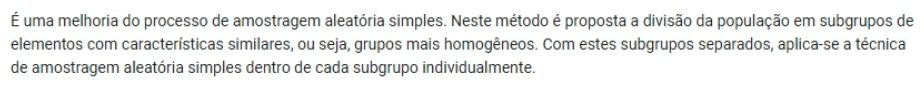

## Amostragem por Conglomerados

Também separamos a amostra em grupos, porém de forma heterogêneas e aplicamos a amostragem simples ou estratificada.

# Nível e Intervalo de Confiança

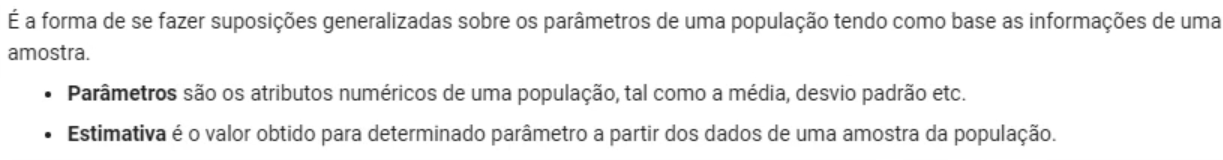

## Teorema do limite central

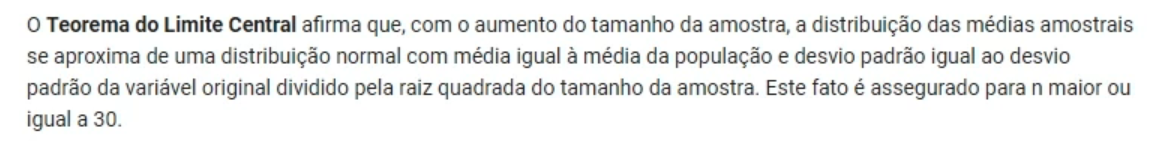

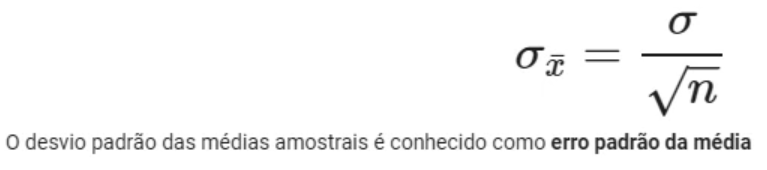

In [ ]:
##

n = 2000
total_amostras = 1500

In [ ]:
## criando um df vázio

amostras = pd.DataFrame()
amostras

Empty DataFrame
Columns: []
Index: []

In [ ]:
## populando a amostras com 2000 linhas e 1500 colunas

for i in range(total_amostras):
  _ = dados.Idade.sample(n)  ## pegando amostras de idade
  _.index = range(0, len(_)) ## determinando o range do index

  amostras['Amostra_' +str(i)]= _


<ipython-input-70-c5cb26fdf267>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' +str(i)]= _
<ipython-input-70-c5cb26fdf267>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' +str(i)]= _
<ipython-input-70-c5cb26fdf267>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy

In [ ]:
amostras

Amostra_0  Amostra_1  Amostra_2  Amostra_3  Amostra_4  Amostra_5  \
0            53         41         35         19         35         51   
1            38         30         58         25         51         58   
2            43         52         58         67         38         54   
3            59         55         36         42         36         46   
4            54         63         43         26         40         53   
...         ...        ...        ...        ...        ...        ...   
1995         57         37         43         69         61         34   
1996         45         73         42         37         46         60   
1997         75         37         21         45         31         51   
1998         47         35         53         61         43         36   
1999         18         49         25         52         39         40   

      Amostra_6  Amostra_7  Amostra_8  Amostra_9  ...  Amostra_1490  \
0            42         54         30         49  ...            27   
1            60         38         56         54  ...            55   
2            52         27         36         41  ...            26   
3            58         55         29         51  ...            27   
4            48         40         55         56  ...            38   
...         ...        ...        ...        ...  ...           ...   
1995         58         62         55         50  ...            39   
1996         35         47         56         50  ...            35   
1997         64         47         34         58  ...            41   
1998         60         49         49         33  ...            36   
1999         40         53         28         38  ...            78   

      Amostra_1491  Amostra_1492  Amostra_1493  Amostra_1494  Amostra_1495  \
0               64            39            23            54            39   
1               37            43            50            44            41   
2               28            26            59            45            46   
3               67            29            34            51            49   
4               44            56            41            41            27   
...            ...           ...           ...           ...           ...   
1995            26            42            43            66            38   
1996            32            48            40            48            48   
1997            30            36            38            29            32   
1998            23            19            46            27            26   
1999            30            61            60            36            43   

      Amostra_1496  Amostra_1497  Amostra_1498  Amostra_1499  
0               60            40            50            35  
1               32            56            34            40  
2               33            60            37            45  
3               36            43            57            24  
4               59            58            33            70  
...            ...           ...           ...           ...  
1995            24            42            71            28  
1996            29            34            36            58  
1997            34            30            57            34  
1998            40            43            46            42  
1999            51            32            32            44  

[2000 rows x 1500 columns]

Agora vamos confirmar o teorema do limite central, que com o aumento do tamanho das amostras a distribuição das médias se aproxima de uma distribuição normal

In [ ]:
amostras.mean()

Amostra_0       44.1420
Amostra_1       43.6675
Amostra_2       44.4140
Amostra_3       44.0880
Amostra_4       43.9475
                 ...   
Amostra_1495    44.3870
Amostra_1496    43.7635
Amostra_1497    44.3215
Amostra_1498    44.1760
Amostra_1499    43.6880
Length: 1500, dtype: float64

<Axes: >

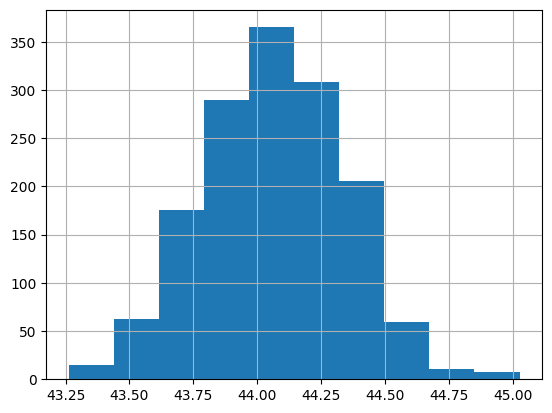

In [ ]:
amostras.mean().hist()

In [ ]:
## media da população

dados.Idade.mean()

44.07142113482561

In [ ]:
## media das medias da amostra

amostras.mean().mean()


44.066870666666674

vamos verificar se o desvio padrão da amostra é igual ao desvo ádrão da variável original dividido pela raiz quadrada do tamanho da amostra

In [ ]:
## desvio da amostra

amostras.mean().std()

0.2764046338624516

In [ ]:
dados.Idade.std()

12.48058346535974

In [ ]:
## desvio da variável original divido pelo tamanho da amostra

dados.Idade.std() / np.sqrt(n)

0.27907433027404266

## Nível de confiança e erro inferencial

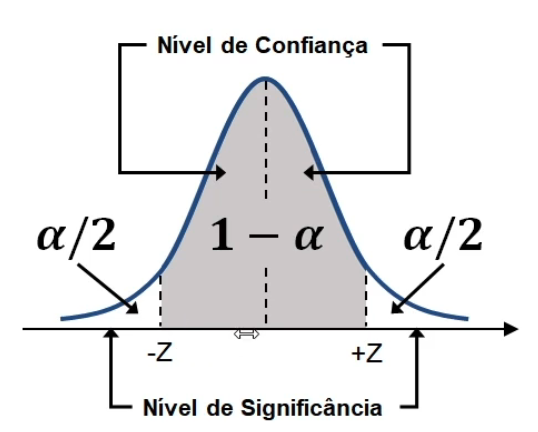

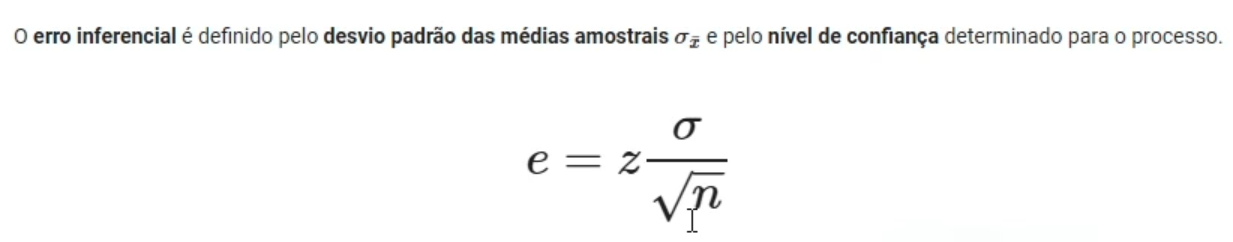

## Intevalo de confiança

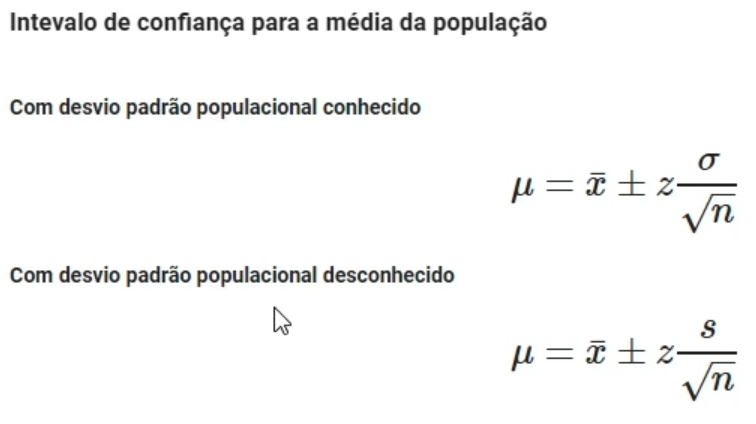

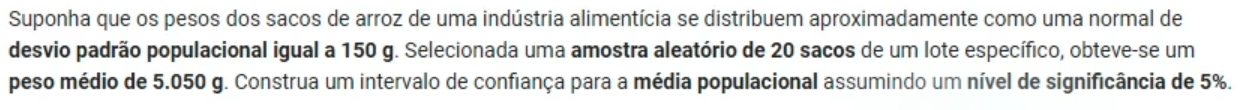

In [ ]:
media_amostra = 5050

In [ ]:
significancia = 0.05

In [ ]:
confiancia = 1 - significancia

In [ ]:
## pegando parte da tabela

tabela_normal_padronizada[16:26]

Z       0.00    0.01    0.02    0.03    0.04    0.05    0.06    0.07    0.08  \
1.60  0.9452  0.9463  0.9474  0.9484  0.9495  0.9505  0.9515  0.9525  0.9535   
1.70  0.9554  0.9564  0.9573  0.9582  0.9591  0.9599  0.9608  0.9616  0.9625   
1.80  0.9641  0.9649  0.9656  0.9664  0.9671  0.9678  0.9686  0.9693  0.9699   
1.90  0.9713  0.9719  0.9726  0.9732  0.9738  0.9744  0.9750  0.9756  0.9761   
2.00  0.9772  0.9778  0.9783  0.9788  0.9793  0.9798  0.9803  0.9808  0.9812   
2.10  0.9821  0.9826  0.9830  0.9834  0.9838  0.9842  0.9846  0.9850  0.9854   
2.20  0.9861  0.9864  0.9868  0.9871  0.9875  0.9878  0.9881  0.9884  0.9887   
2.30  0.9893  0.9896  0.9898  0.9901  0.9904  0.9906  0.9909  0.9911  0.9913   
2.40  0.9918  0.9920  0.9922  0.9925  0.9927  0.9929  0.9931  0.9932  0.9934   
2.50  0.9938  0.9940  0.9941  0.9943  0.9945  0.9946  0.9948  0.9949  0.9951   

Z       0.09  
1.60  0.9545  
1.70  0.9633  
1.80  0.9706  
1.90  0.9767  
2.00  0.9817  
2.10  0.9857  
2.20  0.9890  
2.30  0.9916  
2.40  0.9936  
2.50  0.9952

In [ ]:
## pegamos o valor Z
## significancia + diferença para o total (95%) / metade (2) pois o 0.5 está espelhado

0.5 + (0.95 / 2)

0.975

Vamos na tabela e pegamos o valor Z, de acordo com 0.975, no caso = 1.96

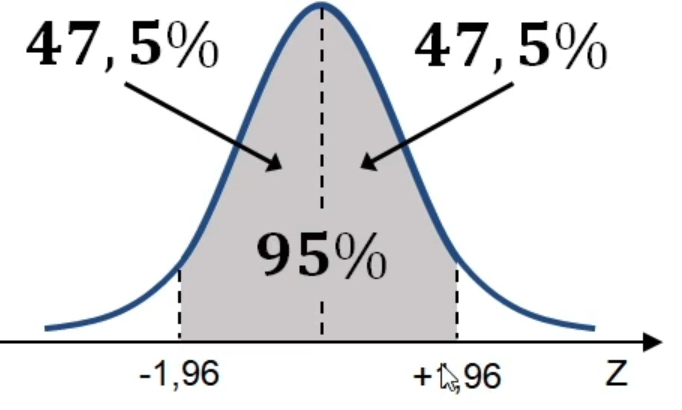

In [ ]:
## usando scipy e o metódo norm.ppf() podemos pegar o valor Z

z = norm.ppf(0.975)
z

1.959963984540054

In [ ]:
## vamos calcular o sigma / desvio padrão das medias amostrais

desvio_padrao = 150
n = 20
raiz_de_n = np.sqrt(n)


In [ ]:
sigma = desvio_padrao / raiz_de_n
sigma

33.54101966249684

In [ ]:
## calculando o erro inferencial

e = z * sigma
e

65.73919054324361

In [ ]:
## calculando o intervalo de confiança para a média manualmente

intervalo = (
    media_amostra - e,
    media_amostra + e
)
intervalo

(4984.260809456757, 5115.739190543243)

In [ ]:
## calculando o intervalo de confiança para a média com scipy

intervalo_scipy = norm.interval(

    confidence= 0.95,
    loc = media_amostra,
    scale = sigma
)
intervalo_scipy

(4984.260809456757, 5115.739190543243)



Para estimar o valor médio gasto por cada cliente de uma grande rede de fast-food, foi selecionada uma amostra de 50 clientes.

Assumindo que o valor do desvio padrão da população seja de R$ 6,00 e que esta população se distribui normalmente, obtenha a margem de erro desta estimativa para um nível de confiança de 95%.

In [ ]:

desvio_padrao = 6
n = 50

sigma = desvio_padrao / np.sqrt(n)
e = z * sigma
e


1.6630845892196133

Uma amostra aleatória simples de 1976 itens de uma população normalmente distribuída, com desvio padrão populacional igual a 11, resultou em uma média amostral de 28.

Qual o intervalo de confiança de 90% para a média populacional?

In [ ]:

media_amostra = 28
desvio_padrao = 11
n = 1976

sigma = desvio_padrao / np.sqrt(n)


intervalo_scipy = norm.interval(

    confidence= 0.90,
    loc = media_amostra,
    scale = sigma
)
intervalo_scipy

(27.592969951356466, 28.407030048643534)

In [ ]:
## outro cálculo

from scipy.stats import norm
import numpy as np

media_amostral = 28
desvio_padrao = 11
n = 1976

norm.interval(confidence = 0.90,
                loc = media_amostral,
                scale = desvio_padrao / np.sqrt(n))

(27.592969951356466, 28.407030048643534)

## Cálculo para a população infinita

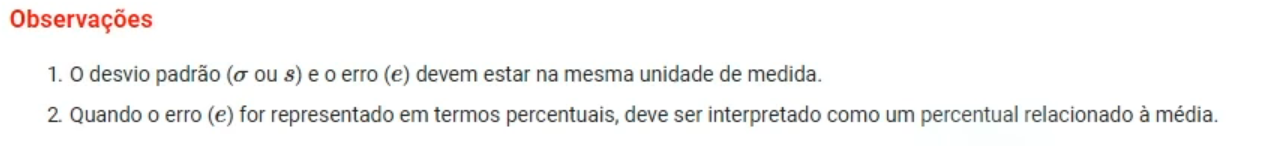

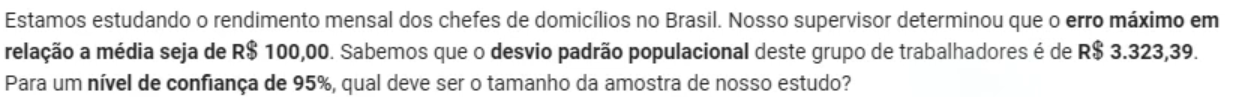

In [ ]:
0.5 + 0.95 / 2

0.975

In [ ]:
z = norm.ppf(0.975)
z

1.959963984540054

In [ ]:
## obtendo o sigma no enunciado

sigma = 3323.39

In [ ]:
## obtendo o erro no enunciado

e = 100

In [ ]:
## calculando o tamanho da amostra

n = (z * (sigma / e)) ** 2
n

4242.860955311813

O valor do gasto médio dos clientes de uma loja de conveniência é de RS 45,50. Assumindo que o desvio padrão dos gastos é igual a R$ 15,00, qual deve ser o tamanho da amostra para estimarmos a média populacional com um nível de significância de 10%?

Considere que o erro máximo aceitável seja de 10%.

In [ ]:
0.5 + 0.90 / 2

0.95

In [ ]:

z = norm.ppf(0.95)
sigma = 15
e = 0.10 * 45.5
n = (z * (sigma / e)) ** 2
n

29.404529751067166

In [ ]:
from scipy.stats import norm

media = 45.5
sigma = 15
significancia = 0.10
confianca = 1 - significancia

z = norm.ppf(0.5 + (confianca / 2))
erro_percentual = 0.10
e = media * erro_percentual

n = (z * (sigma / e)) ** 2
n.round()

29.0

## Cálculo para a população finita

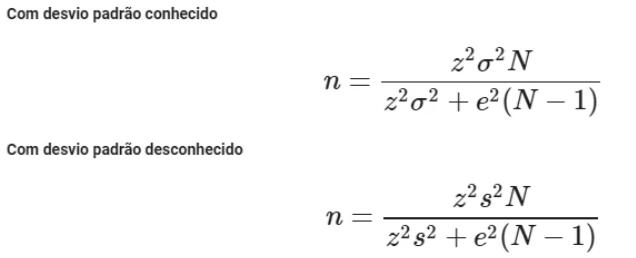

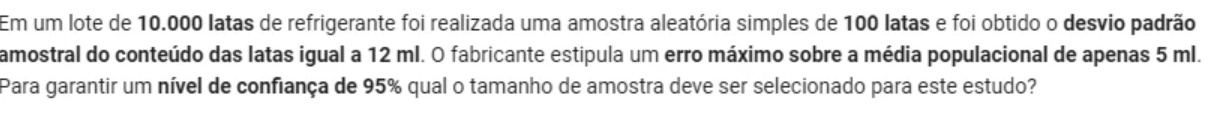

In [ ]:
## definindo os elementos e z

N = 10000
z = norm.ppf( 0.5 + 0.95 / 2)
s = 12  ## desvio amostral
e = 5


In [ ]:
## calculando a amostra manualmente

n = ((z ** 2) * (s ** 2) * (N)) / (((z ** 2) * (s ** 2)) + ((e ** 2) * (N - 1)))
int(n.round())

22

Um fabricante de farinha verificou que, em uma amostra aleatória formada por 200 sacos de 25 kg de um lote formado por 2.000 sacos, apresentou um desvio padrão amostral do peso igual a 480 g.

Considerando um erro máximo associado à média populacional igual a 0,3 kg e um nível de confiança igual a 95%, qual tamanho de amostra deveria ser selecionado para obtermos uma estimativa confiável do parâmetro populacional?

In [ ]:
## definindo os elementos e z

N = 2000
z = norm.ppf( 0.5 + 0.95 / 2)
s = 0.48 ## 480 / 100 pois deve estar no mesmo parâmetro que a amostra (KG)
e = 0.3

## calculando a amostra manualmente

n = ((z ** 2) * (s ** 2) * (N)) / (((z ** 2) * (s ** 2)) + ((e ** 2) * (N - 1)))
int(n.round())

10

In [ ]:
## Lembrando sempre de verificar as unidades de medida do erro, média e desvio padrão. Segue o código proposto para a solução:

from scipy.stats import norm

N = 2000
z = norm.ppf(0.5 + (0.95 / 2))
s = 480
e = 0.3 * 1000   # Convertendo kg para g

n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
int(n.round())

10

# Usando o Dataset

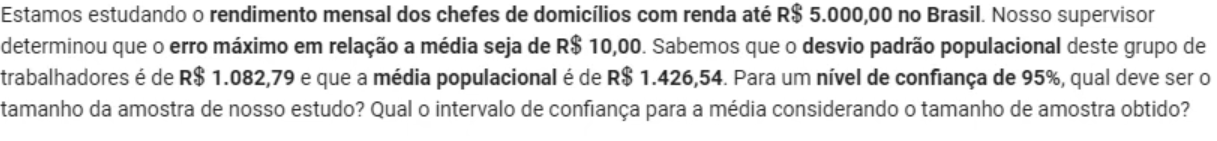

In [ ]:
## usamos .query para buscar as rendas menores ou iguais a 5000 e atribuimos na variável renda_5000

renda_5000 = dados.query('Renda <= 5000').Renda
renda_5000

0         800
1        1150
2         880
3        3500
4         150
         ... 
76835     812
76836    1500
76837    1300
76838    1500
76839     900
Name: Renda, Length: 72109, dtype: int64

In [ ]:
## pegando o valor do desvio padrão

sigma = renda_5000.std()
sigma

1082.7945490306845

In [ ]:
## pegando a média

media = renda_5000.mean()
media

1426.5372144947232

Por ser uma população muito grande, assumimos ser uma população infinita

In [ ]:
## Calculando o tamanho da amostra

z = norm.ppf(0.975)
e = 10
n = (z * (sigma / e)) ** 2
n = int(n.round())
n

45039

In [ ]:
## calculando o intervalo de confiança

intervalo = norm.interval(0.95, loc=media, scale=sigma / np.sqrt(n))
intervalo

(1416.5372195108237, 1436.5372094786228)